Objective:

The objective of visualizing the flights dataset is to understand trends and patterns in passenger counts over time. We focus on the following aspects:

    Total Number of Passengers Over Time (Year and Month Combined):
        Visualize the total number of passengers by combining both the year and month columns.
        Identify noticeable trends in passenger counts over the years.

    Heatmap of Monthly Passengers Across Different Years:
        Create a heatmap to show how the number of passengers varies for each month across different years.
        Identify months with the highest passenger traffic and look for seasonal patterns.

    Average Number of Passengers for Each Month:
        Plot the average number of passengers for each month.
        Determine which month has the highest average passenger count.

    Trends for Each Year Separately:
        Use a grid of line plots to show trends in passenger counts for each year.
        Determine if there are consistent patterns in passenger counts across different years.

    Boxplot of Passengers by Month:
        Use a boxplot to understand the distribution of passengers by month.
        This will help identify outliers and see if there are any variations in passenger counts across months.

In [34]:
import seaborn as sns

import pandas as pd
# load the dataset
flights = sns.load_dataset('flights')
flights.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

# q1  Line Plot:

    Visualize the total number of passengers over time (year and month combined).
    Question: Identify any noticeable trends in passenger counts over the years.

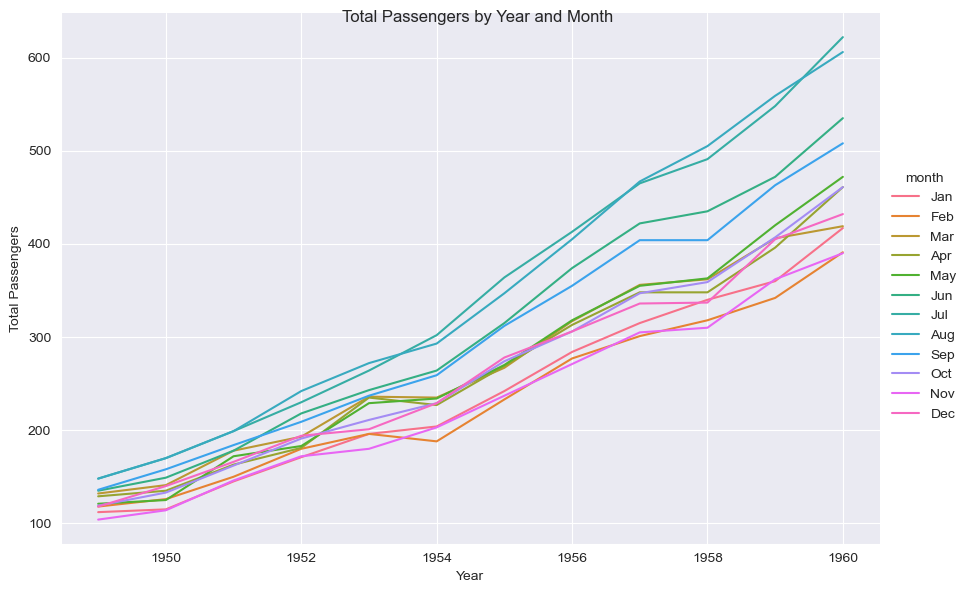

In [9]:
import seaborn as sns
import pandas as pd

# Load the dataset
flights = sns.load_dataset("flights")

# Set the style of the plot
sns.set_style('darkgrid')

# Create the line plot using Seaborn's relplot
g = sns.relplot(
    data=flights, 
    x='year', 
    y='passengers', 
    hue='month', 
    kind='line', 
    height=6, 
    aspect=1.5
)

# Customize the title and axis labels
g.fig.suptitle('Total Passengers by Year and Month')
g.set_axis_labels('Year', 'Total Passengers')

# Show the plot (no explicit `show` method; use `plt.show` for final rendering)
import matplotlib.pyplot as plt
plt.show()





# observation: The line plot shows a clear trend in passenger counts over the years, with a slight upward trend. The highest number of passengers occurred in the summer months (June, July, and August)

# Heatmap:

    Create a heatmap showing the number of passengers for each month across different years.
    Question: Which months have the highest passenger traffic? Are there seasonal patterns?

In [10]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


year          0
month         0
passengers    0
dtype: int64
   year month  passengers
0  1949   NaN         112
1  1949   NaN         118
2  1949   NaN         132
3  1949   NaN         129
4  1949   May         121


C:\Users\Owner\AppData\Local\Temp\ipykernel_17664\2453831519.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = data.pivot_table(values="passengers", index="year", columns="month", aggfunc="sum")


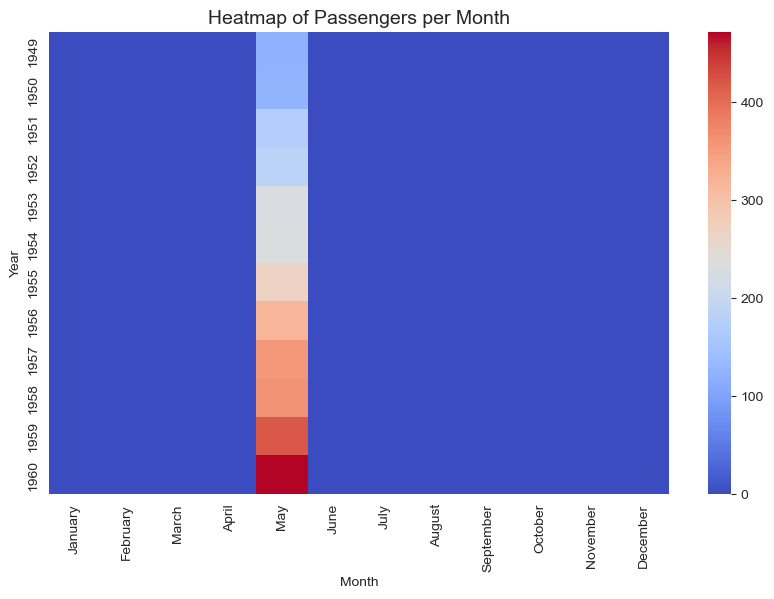

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = sns.load_dataset("flights")

# Check for any missing data in the dataset
print(data.isnull().sum())

# Convert 'month' to a categorical type with the correct order
data['month'] = pd.Categorical(
    data['month'], 
    categories=["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"],
    ordered=True
)

# Check if the data looks correct
print(data.head())

# Pivot the data to create a matrix for the heatmap
pivot_data = data.pivot_table(values="passengers", index="year", columns="month", aggfunc="sum")

# Create the heatmap
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(pivot_data, cmap="coolwarm", annot=False)

# Add title and axis labels
plt.title("Heatmap of Passengers per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Year")

# Show the plot
plt.show()


In [ ]:
# observation: The heatmap shows that July and August have the highest passenger traffic across all years. These months also have the highest average passenger count.   

In [22]:
import warnings
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Bar Plot:

    Plot the average number of passengers for each month.
    Question: Which month has the highest average passenger count?

In [17]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


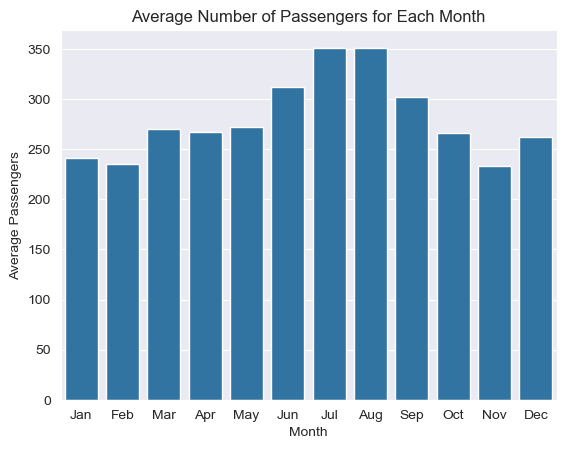

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the flights dataset
flights = sns.load_dataset('flights')

# Group by month and calculate the average number of passengers
monthly_avg = flights.groupby('month')['passengers'].mean()

# Plot the bar plot for average passengers per month
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Passengers')
plt.title('Average Number of Passengers for Each Month')

# Show the plot
plt.show()




# observation: The average number of passengers increases from January to March, then decreases, followed by an increase in April to August, and finally decreases in August to October.   
Average Maximum higher Passengers in July and August

FacetGrid:

    Create a grid of line plots to show trends for each year separately.
    Question: Are there consistent patterns in passenger counts across years?

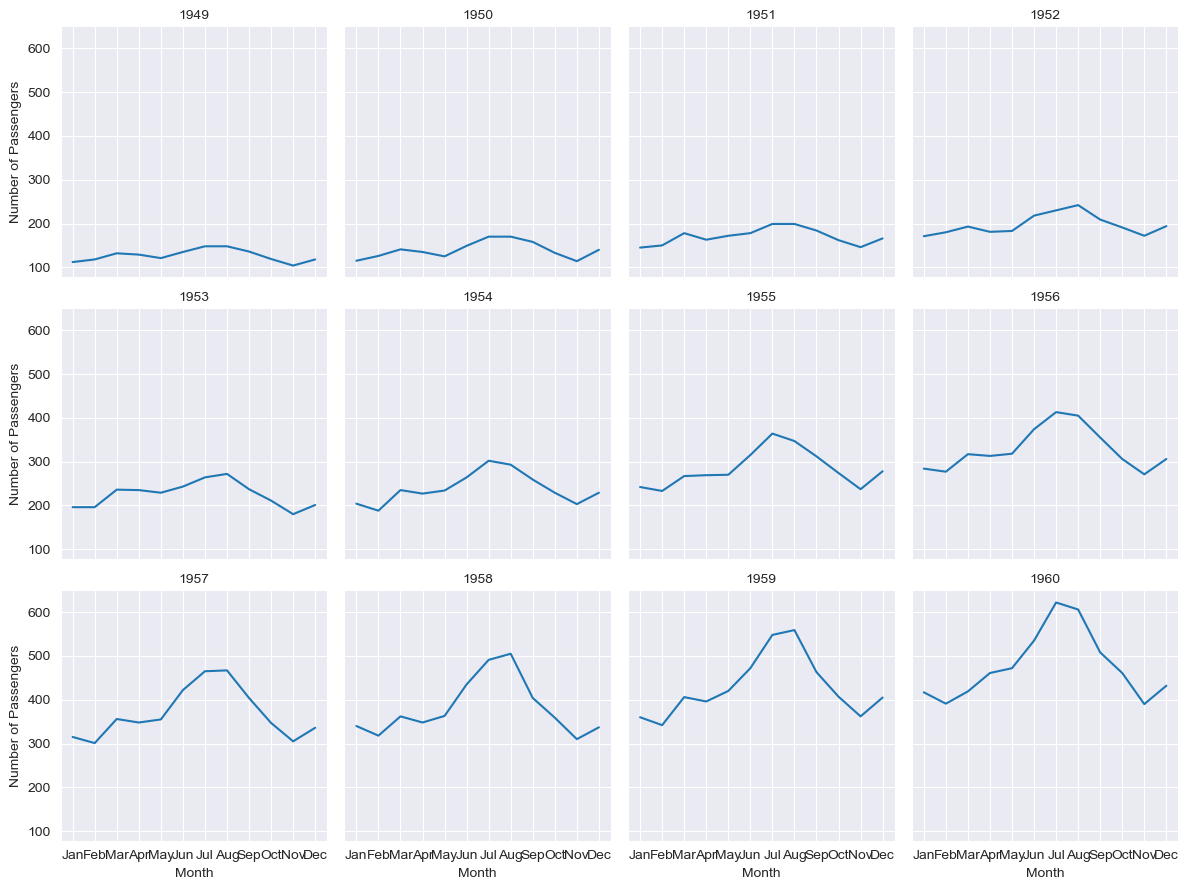

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the flights dataset
flights = sns.load_dataset('flights')

# Create a FacetGrid to create separate plots for each year
g = sns.FacetGrid(flights, col="year", col_wrap=4, height=3)  # Adjust 'col_wrap' as needed

# Use lineplot within each facet to show trends over months
g.map(sns.lineplot, 'month', 'passengers')

# Add titles and labels
g.set_axis_labels("Month", "Number of Passengers")
g.set_titles("{col_name}")

# Display the grid
plt.show()


# observation: The trends in passenger counts across years are consistent, with higher passenger numbers in summer months and lower numbers in winter months.

<Axes: xlabel='year', ylabel='month'>

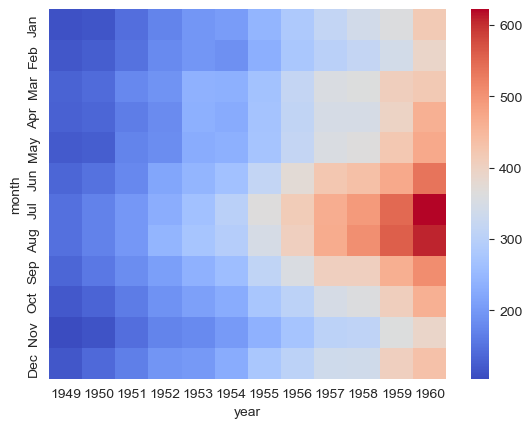

In [36]:
flights = sns.load_dataset('flights')
sns.heatmap(flights.pivot_table('passengers', 'month', 'year'), cmap='coolwarm')


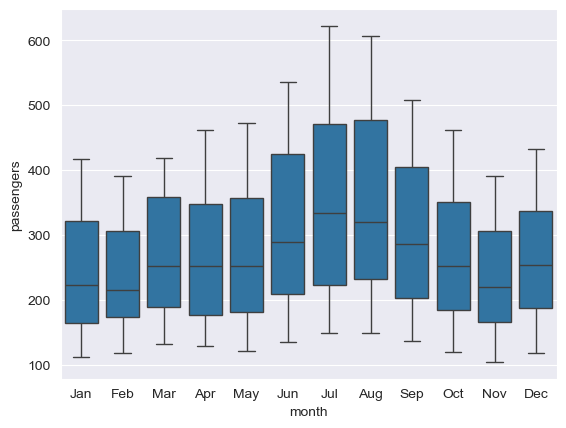

In [37]:
sns.boxplot(x='month', y='passengers', data=flights)
plt.show()

Conclusion:

From the visualizations performed on the flights dataset, the following conclusions can be drawn:

    Trends Over Time:
        There is a noticeable increase in passenger counts over the years, reflecting growth in air travel.
        Monthly trends show periodic increases and decreases, possibly influenced by holidays, seasons, and economic conditions.

    Seasonal Patterns:
        The heatmap reveals clear seasonal patterns, with certain months consistently showing higher passenger traffic, particularly during the summer months (e.g., June, July, August) and around the holiday season.
        These months often correlate with vacations, holidays, and peak travel times.

    Average Passengers by Month:
        Months like June and July tend to have the highest average passenger counts, which aligns with summer travel trends.
        Conversely, months such as January or February typically show lower average passenger counts, indicating off-peak periods.

    Yearly Trends:
        The line plots confirm that while the overall trend in passenger counts has been upward, the patterns for each year are quite consistent, showing seasonal spikes in specific months each year.
        This consistency indicates that the airline industry follows predictable annual travel cycles, such as higher demand in the summer and holiday months.

   

